### Let's consider more realistic example:
### Let's download some images

In [ ]:
!pip install openimages

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.7/132.7 KB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 KB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 4.5 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [ ]:
import os
from openimages.download import download_dataset

In [ ]:
data_dir = "data"
## Let's download some images eg. 100 each
number_for_samples = 100
classes = ["Apple", "Motorcycle", "Human body"]

In [ ]:
if not os.path.exists(data_dir):
    os.makedirs(data_dir)

In [ ]:
print("Downloading is starting...")
download_dataset(data_dir, classes, limit=number_for_samples)

100%|██████████| 100/100 [00:03<00:00, 30.16it/s]


{'apple': {'images_dir': 'data/apple/images'},
 'motorcycle': {'images_dir': 'data/motorcycle/images'},
 'human body': {'images_dir': 'data/human body/images'}}

In [ ]:
import torch
import torchvision

In [ ]:
from torchvision import datasets
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
import numpy as np
from skimage import io
from skimage.transform import resize
import glob
import PIL
import matplotlib.pyplot as plt

In [ ]:
# Later if we will use some existing models, then some initial data transformations will be nessisary


In [ ]:
scaler = transforms.Resize((224, 224))
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
to_tensor = transforms.ToTensor()

In [ ]:
def read_img(file_name):
    img = Image.open(file_name)
    t_img = Variable(normalize(to_tensor(scaler(img))).unsqueeze(0))
    return t_img.float()

In [ ]:
## Let's define additional data transformations

In [ ]:
transform = transforms.Compose([
    torchvision.transforms.Resize((224,224)),
    torchvision.transforms.ColorJitter(hue=.05, saturation=.05),
    torchvision.transforms.RandomHorizontalFlip(),
    torchvision.transforms.RandomRotation(20, interpolation=PIL.Image.BILINEAR),
    transforms.ToTensor()
])

In [ ]:
dataset = datasets.ImageFolder("data/", transform = transform)

In [ ]:
#dataset.imgs

In [ ]:
train_dataset = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True)

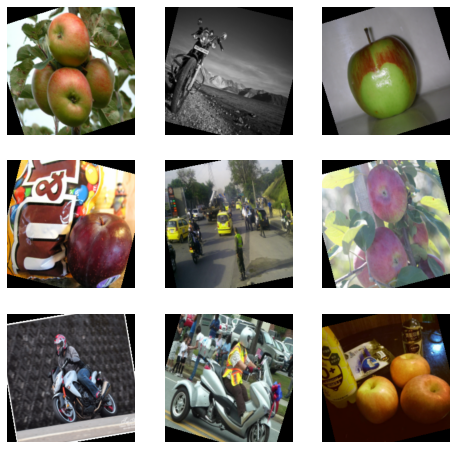

In [ ]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(dataset), size=(1,)).item()
    img, label = dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    im = img.permute(1, 2, 0)
    plt.axis("off")
    plt.imshow(im.squeeze(), cmap="gray")
plt.show()

torch.Size([224, 224, 3])


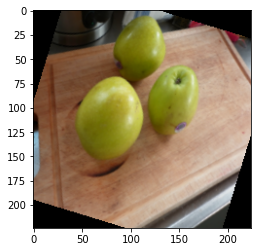

In [ ]:
images, labels = next(iter(train_dataset))
im = images.permute(0, 2, 3, 1)
print(im[0].shape)
plt.imshow(im[0])